In [131]:
import pandas as pd
from scipy.io.arff import loadarff
# from matplot import pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [119]:
raw_data = loadarff('dataset.arff')
df = pd.DataFrame(raw_data[0])
a = df.head(2)
print(a)

     V1             V2          V3            V4     V5      V6      V7  \
0  58.0  b'management'  b'married'   b'tertiary'  b'no'  2143.0  b'yes'   
1  44.0  b'technician'   b'single'  b'secondary'  b'no'    29.0  b'yes'   

      V8          V9  V10     V11    V12  V13  V14  V15         V16 Class  
0  b'no'  b'unknown'  5.0  b'may'  261.0  1.0 -1.0  0.0  b'unknown'  b'1'  
1  b'no'  b'unknown'  5.0  b'may'  151.0  1.0 -1.0  0.0  b'unknown'  b'1'  


In [120]:
df.rename(columns={'V1': 'age', 'V2': 'job', 'V3': 'marital', 'V4': 'education', 'V5': 'default_in_credit', 'V6': 'balance', 'V7': 'housing_loan', 'V8': 'personal_loan', 'V9': 'contact', 'V10': 'last_day_contact_of_month', 'V11': 'last_month_contact_of_year', 'V12': 'contact_duration', 'V13': 'number_of_contacts_performed_during_campaign', 'V14': 'last_contact_of_previous_campaign', 'V15': 'number_of_contact_of_previous_campaign', 'V16': 'outcome_of_previous_campaign', 'Class': 'has_subscribed'}, inplace = True)
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,b'management',b'married',b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,b'management',b'single',b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,b'entrepreneur',b'divorced',b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,b'retired',b'married',b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,b'technician',b'single',b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


In [118]:
df.head(10)

,age,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,...,30.0,46.0,27.0,58.0,33.0,35.0,34.0,36.0,39.0,44.0
0,58.0,b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',...,30,46,27,58,33,35,34,36,39,44
1,44.0,b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',...,30,46,27,58,33,35,34,36,39,44
2,33.0,b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',...,30,46,27,58,33,35,34,36,39,44
3,47.0,b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',...,30,46,27,58,33,35,34,36,39,44
4,33.0,b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',...,30,46,27,58,33,35,34,36,39,44
5,35.0,b'married',b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',...,30,46,27,58,33,35,34,36,39,44
6,28.0,b'single',b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',...,30,46,27,58,33,35,34,36,39,44
7,42.0,b'divorced',b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',...,30,46,27,58,33,35,34,36,39,44
8,58.0,b'married',b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',...,30,46,27,58,33,35,34,36,39,44
9,43.0,b'single',b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',...,30,46,27,58,33,35,34,36,39,44


In [121]:
df_job = pd.get_dummies(df['job'])
df_job.head(5)

,b'admin.',b'blue-collar',b'entrepreneur',b'housemaid',b'management',b'retired',b'self-employed',b'services',b'student',b'technician',b'unemployed',b'unknown'
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [124]:
dict_job = {}
i=0
for job in df_job.columns.values:
    dict_job[job] = i
    i+=1
print(dict_job)

{b'admin.': 0, b'blue-collar': 1, b'entrepreneur': 2, b'housemaid': 3, b'management': 4, b'retired': 5, b'self-employed': 6, b'services': 7, b'student': 8, b'technician': 9, b'unemployed': 10, b'unknown': 11}


In [125]:
for job in dict_job.keys():
    df['job'].loc[(df['job'] == job)] = dict_job[job]

C:\Users\nick7423\AppData\Local\Temp\ipykernel_20696\1036455141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'].loc[(df['job'] == job)] = dict_job[job]


In [126]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,9,b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,2,b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,1,b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,11,b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,4,b'married',b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,4,b'single',b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,2,b'divorced',b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,5,b'married',b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,9,b'single',b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


<AxesSubplot: xlabel='age', ylabel='balance'>

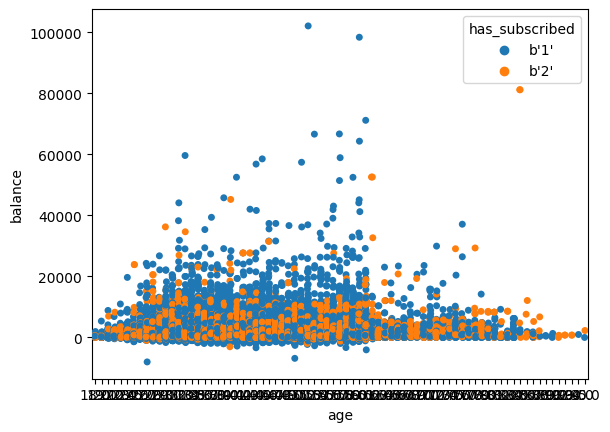

In [127]:
sns.stripplot(x='age', y='balance', hue='has_subscribed', data=df)

In [128]:
df_marital = pd.get_dummies(df['marital'])

In [129]:
df_marital.head(10)

,b'divorced',b'married',b'single'
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,0,1,0
6,0,0,1
7,1,0,0
8,0,1,0
9,0,0,1


In [133]:
dict_marital = {b'single': 0, b'married': 1, b'divorced': 2}
print(dict_marital)

{b'single': 0, b'married': 1, b'divorced': 2}


In [134]:
for marital in dict_marital.keys():
    df['marital'].loc[(df['marital'] == marital)] = dict_marital[marital]
warnings.filterwarnings('ignore')

C:\Users\nick7423\AppData\Local\Temp\ipykernel_20696\2856699332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital'].loc[(df['marital'] == marital)] = dict_marital[marital]


In [135]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,9,0,b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,2,1,b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,1,1,b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,11,0,b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'
5,35.0,4,1,b'tertiary',b'no',231.0,b'yes',b'no',b'unknown',5.0,b'may',139.0,1.0,-1.0,0.0,b'unknown',b'1'
6,28.0,4,0,b'tertiary',b'no',447.0,b'yes',b'yes',b'unknown',5.0,b'may',217.0,1.0,-1.0,0.0,b'unknown',b'1'
7,42.0,2,2,b'tertiary',b'yes',2.0,b'yes',b'no',b'unknown',5.0,b'may',380.0,1.0,-1.0,0.0,b'unknown',b'1'
8,58.0,5,1,b'primary',b'no',121.0,b'yes',b'no',b'unknown',5.0,b'may',50.0,1.0,-1.0,0.0,b'unknown',b'1'
9,43.0,9,0,b'secondary',b'no',593.0,b'yes',b'no',b'unknown',5.0,b'may',55.0,1.0,-1.0,0.0,b'unknown',b'1'


In [139]:
df['default_in_credit'].loc[(df['default_in_credit'] == b'no')] = 0
df['default_in_credit'].loc[(df['default_in_credit'] == b'yes')] = 1
df['housing_loan'].loc[(df['housing_loan'] == b'no')] = 0
df['housing_loan'].loc[(df['housing_loan'] == b'yes')] = 1
df['personal_loan'].loc[(df['personal_loan'] == b'no')] = 0
df['personal_loan'].loc[(df['personal_loan'] == b'yes')] = 1
df['last_contact_of_previous_campaign'].loc[(df['last_contact_of_previous_campaign'] == -1.0)] = 0

In [140]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,b'tertiary',0,2143.0,1,0,b'unknown',5.0,b'may',261.0,1.0,0.0,0.0,b'unknown',b'1'
1,44.0,9,0,b'secondary',0,29.0,1,0,b'unknown',5.0,b'may',151.0,1.0,0.0,0.0,b'unknown',b'1'
2,33.0,2,1,b'secondary',0,2.0,1,1,b'unknown',5.0,b'may',76.0,1.0,0.0,0.0,b'unknown',b'1'
3,47.0,1,1,b'unknown',0,1506.0,1,0,b'unknown',5.0,b'may',92.0,1.0,0.0,0.0,b'unknown',b'1'
4,33.0,11,0,b'unknown',0,1.0,0,0,b'unknown',5.0,b'may',198.0,1.0,0.0,0.0,b'unknown',b'1'
5,35.0,4,1,b'tertiary',0,231.0,1,0,b'unknown',5.0,b'may',139.0,1.0,0.0,0.0,b'unknown',b'1'
6,28.0,4,0,b'tertiary',0,447.0,1,1,b'unknown',5.0,b'may',217.0,1.0,0.0,0.0,b'unknown',b'1'
7,42.0,2,2,b'tertiary',1,2.0,1,0,b'unknown',5.0,b'may',380.0,1.0,0.0,0.0,b'unknown',b'1'
8,58.0,5,1,b'primary',0,121.0,1,0,b'unknown',5.0,b'may',50.0,1.0,0.0,0.0,b'unknown',b'1'
9,43.0,9,0,b'secondary',0,593.0,1,0,b'unknown',5.0,b'may',55.0,1.0,0.0,0.0,b'unknown',b'1'


In [141]:
df_education = pd.get_dummies(df['education'])
df_education.head(10)

,b'primary',b'secondary',b'tertiary',b'unknown'
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,1,0,0


In [142]:
dict_education = {b'unknown': 0, b'primary': 1, b'secondary': 2, b'tertiary': 3}
print(dict_education)

{b'unknown': 0, b'primary': 1, b'secondary': 2, b'tertiary': 3}


In [143]:
for education in dict_education.keys():
    df['education'].loc[(df['education'] == education)] = dict_education[education]
    warnings.filterwarnings('ignore')

In [144]:
df.head(10)

,age,job,marital,education,default_in_credit,balance,housing_loan,personal_loan,contact,last_day_contact_of_month,last_month_contact_of_year,contact_duration,number_of_contacts_performed_during_campaign,last_contact_of_previous_campaign,number_of_contact_of_previous_campaign,outcome_of_previous_campaign,has_subscribed
0,58.0,4,1,3,0,2143.0,1,0,b'unknown',5.0,b'may',261.0,1.0,0.0,0.0,b'unknown',b'1'
1,44.0,9,0,2,0,29.0,1,0,b'unknown',5.0,b'may',151.0,1.0,0.0,0.0,b'unknown',b'1'
2,33.0,2,1,2,0,2.0,1,1,b'unknown',5.0,b'may',76.0,1.0,0.0,0.0,b'unknown',b'1'
3,47.0,1,1,0,0,1506.0,1,0,b'unknown',5.0,b'may',92.0,1.0,0.0,0.0,b'unknown',b'1'
4,33.0,11,0,0,0,1.0,0,0,b'unknown',5.0,b'may',198.0,1.0,0.0,0.0,b'unknown',b'1'
5,35.0,4,1,3,0,231.0,1,0,b'unknown',5.0,b'may',139.0,1.0,0.0,0.0,b'unknown',b'1'
6,28.0,4,0,3,0,447.0,1,1,b'unknown',5.0,b'may',217.0,1.0,0.0,0.0,b'unknown',b'1'
7,42.0,2,2,3,1,2.0,1,0,b'unknown',5.0,b'may',380.0,1.0,0.0,0.0,b'unknown',b'1'
8,58.0,5,1,1,0,121.0,1,0,b'unknown',5.0,b'may',50.0,1.0,0.0,0.0,b'unknown',b'1'
9,43.0,9,0,2,0,593.0,1,0,b'unknown',5.0,b'may',55.0,1.0,0.0,0.0,b'unknown',b'1'


In [145]:
df_outcome_previous = pd.get_dummies(df['outcome_of_previous_campaign'])
df_outcome_previous.head(10)

,b'failure',b'other',b'success',b'unknown'
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1
